In [1]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#useful imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [31]:
df = pd.read_csv('Breast_Cancer.csv', delimiter=',')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [32]:
from sklearn.model_selection import train_test_split


features = df.drop("Status",axis=1)
target = df.loc[:, "Status"]

features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.1,random_state=3)

In [4]:
def relabeling(features, target):
    features['T Stage '].replace({'T1': 0, 'T2': 1, 'T3': 2, 'T4': 3}, inplace=True)
    features['N Stage'].replace({'N1': 0, 'N2': 1, 'N3': 2}, inplace=True)
    features['6th Stage'].replace({'IIA': 0, 'IIB': 1, 'IIIA': 2, 'IIIB': 3, 'IIIC': 4}, inplace=True)
    features['differentiate'].replace({'Undifferentiated': 0, 'Poorly differentiated': 1, 'Moderately differentiated': 2, 'Well differentiated': 3}, inplace=True)
    features['Grade'].replace({'1': 0, '2': 1,'3': 2, ' anaplastic; Grade IV': 3}, inplace=True)
    features['A Stage'].replace({'Regional': 0, 'Distant': 1}, inplace=True)
    #features['Estrogen Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)?
    #features['Progesterone Status'].replace({'Positive': 1, 'Negative': 0}, inplace=True)?
    target.replace({'Alive': 0, 'Dead': 1}, inplace=True)
    return features, target

In [5]:
def feature_engineering(features, cols_cat_nom, cols_num):
    df = features.copy()
    df.loc[:, "Age_group"] = pd.cut(x=df.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
                        labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
                                 '60-64','65-69'])
    df = df.drop('Age', axis=1)
    cols_cat_nom.append("Age_group")
    cols_num.remove('Age')
    return df, cols_cat_nom, cols_num

In [33]:
cols_cat = [col for col in df.select_dtypes("object")]
cols_num = [col for col in df.select_dtypes(include=["int64","float64"])]
cols_cat_nom = ['Race', 'Marital Status', '6th Stage', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']
cols_cat_ord = ['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage']

In [7]:
#features_train.loc[:, "Age_group"] = pd.cut(x=features_train.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
 #                       labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
  #                               '60-64','65-69'])
#features_train = features_train.drop('Age', axis=1)
#cols_cat_nom.append("Age_group")
#cols_num.remove('Age')

In [8]:
display(cols_cat_nom)
display(cols_num)
display(features_train.head())
display(features_test.head())

['Race',
 'Marital Status',
 '6th Stage',
 'differentiate',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status']

['Age',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
3436,55,White,Married,T2,N1,IIB,Well differentiated,1,Regional,27,Positive,Positive,16,1,97
1721,50,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,30,Positive,Positive,18,2,64
2995,61,Other,Married,T3,N3,IIIC,Moderately differentiated,2,Regional,55,Positive,Positive,32,19,102
330,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,35,Positive,Positive,24,1,100
1142,46,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,37,Positive,Positive,17,9,61


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
3027,52,White,Single,T1,N1,IIA,Poorly differentiated,3,Regional,11,Positive,Positive,1,1,89
1740,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,1,1,80
2878,54,White,Single,T2,N3,IIIC,Poorly differentiated,3,Regional,25,Negative,Negative,13,13,63
879,40,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Negative,16,1,85
658,51,White,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,32,Positive,Positive,11,10,76


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

pipeline_rf = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=0))])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

pipeline_rf2 = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom),
                    ('ord_transformer', OrdinalEncoder(), cols_cat_ord)                    
                    ], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=0))])
pipeline_rf.fit(features_train, target_train)
target_test_pred = pipeline_rf2.predict(features_test)
target_test_pred

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: could not convert string to float: 'T2'

In [10]:
features_train_rel, target_train_rel = relabeling(features_train, target_train)

In [11]:
pipeline_rf.fit(features_train_rel, target_train_rel)

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Race', 'Marital Status',
                                                   '6th Stage', 'differentiate',
                                                   'A Stage', 'Estrogen Status',
                                                   'Progesterone Status'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=0))])

In [12]:
#features_test["Age_group"] = pd.cut(x=features_test.loc[:, 'Age'], bins=[30,34,39,44,49,54,59,64,69],
  #                      labels = ['30-34','35-39','40-44','45-49','50-54','55-59',
   #                              '60-64','65-69'])
#features_test = features_test.drop('Age', axis=1)

features_test_rel, target_test_rel = relabeling(features_test, target_test)
target_test_pred_rf = pipeline_rf.predict(features_test_rel)

In [13]:
model_results = []

scores = {'name': "RandomForestClassifier",
          'accuracy': accuracy_score(target_test_rel,target_test_pred_rf) * 100,
          'precision': precision_score(target_test_rel,target_test_pred_rf) * 100,
          'recall': recall_score(target_test_rel,target_test_pred_rf) * 100,
          'F1': f1_score(target_test_rel,target_test_pred_rf) * 100,
             }
model_results.append(scores)
pd.DataFrame(model_results).T


,0
name,RandomForestClassifier
accuracy,89.578164
precision,83.870968
recall,41.269841
F1,55.319149


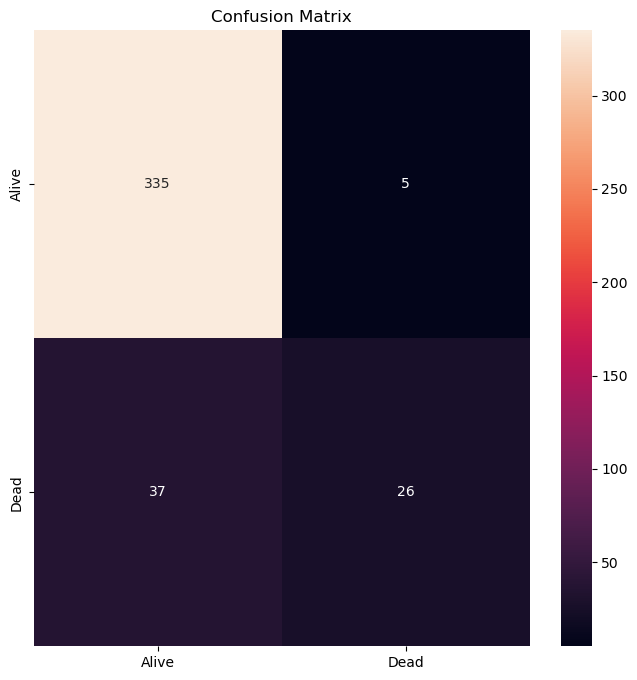

In [14]:
labels = ['Alive', 'Dead']
cm = confusion_matrix(target_test_rel, target_test_pred_rf)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.show()

In [15]:
# report
report = classification_report(target_test_rel, target_test_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       340
           1       0.84      0.41      0.55        63

    accuracy                           0.90       403
   macro avg       0.87      0.70      0.75       403
weighted avg       0.89      0.90      0.88       403



In [16]:
# Run GridSearch with RandomForest

# initiate model


# Create the parameter grid
grid_search_rf = [{'classifier__max_depth':[10,11,12,13,14,15, 20],       
                    'classifier__max_features':[2, 3, 4, 5, 6, 8, 20,"auto"],
                    'classifier__min_samples_split':[2, 3, 4],
                    'classifier__min_samples_leaf':[2, 3, 4]
                    }]

# Create an instance of GridSearch 
grid_rf = GridSearchCV(estimator=pipeline_rf,
                     param_grid = grid_search_rf,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

# Train the RandomForestClassifier
grid_rf.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_rf.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_rf.best_params_)

# Print the val score of the best model
#predict
target_test_pred_rf_grid = grid_rf.best_estimator_.predict(features_test_rel)

#save
scores = {'name': "RandomForest_GridSearch",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_rf_grid) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_rf_grid) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


best score
0.6387256778309409
best model parameter
{'classifier__max_depth': 14, 'classifier__max_features': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


,0,1
name,RandomForestClassifier,RandomForest_GridSearch
accuracy,89.578164,89.578164
precision,83.870968,74.418605
recall,41.269841,50.793651
F1,55.319149,60.377358


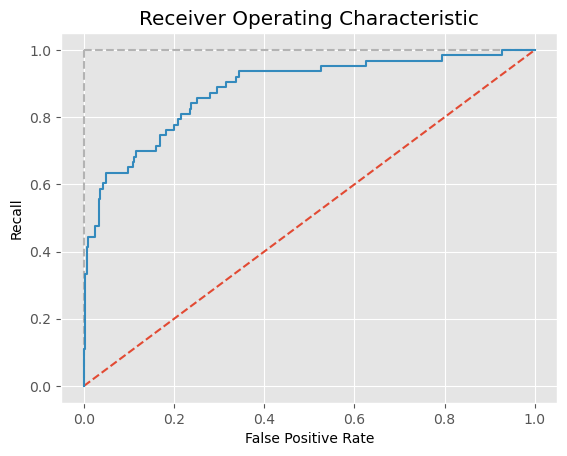

In [17]:
#### print roc-curve

# create DataFrame with one column named prediction
df_pred_test = pd.DataFrame(target_test_pred_rf_grid, columns=['prediction'])

# predict probabilities and add them as new column
df_pred_test.loc[:, 'probability'] = grid_rf.best_estimator_.predict_proba(features_test_rel)[:, 1]  

# calculate roc-curve
from sklearn.metrics import roc_curve

false_positive_rate, recall, threshold = roc_curve(target_test_rel, df_pred_test.loc[:, 'probability']) 

# plotting
plt.style.use('ggplot')

# figure and axes intialisation
fig, ax = plt.subplots()

# reference lines
ax.plot([0, 1], ls = "--")  # blue diagonal
ax.plot([0, 0], [1, 0], c=".7", ls='--')  # grey vertical
ax.plot([1, 1], c=".7", ls='--')  # grey horizontal

# roc curve
ax.plot(false_positive_rate, recall)

# labels
ax.set_title("Receiver Operating Characteristic")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("Recall");

In [18]:
# Logistic Regression

# create Pipeline
pipeline_log = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))])

# fit pipeline on cleaned training set
pipeline_log.fit(features_train_rel, target_train_rel)

# predict and evaluate on test set

#predict
target_test_pred_log = pipeline_log.predict(features_test_rel)

#save
scores = {'name': "LogisticRegression",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_log) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_log) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_log) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_log) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression
accuracy,89.578164,89.578164,80.8933
precision,83.870968,74.418605,43.396226
recall,41.269841,50.793651,73.015873
F1,55.319149,60.377358,54.43787


In [19]:
# report
report = classification_report(target_test_rel, target_test_pred_log)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       340
           1       0.43      0.73      0.54        63

    accuracy                           0.81       403
   macro avg       0.69      0.78      0.71       403
weighted avg       0.86      0.81      0.83       403



In [20]:
# Run GridSearch with LogisticRegression

# creat C_values
import numpy as np 
C_values = [0.01, 0.1, 1, 10, 100]

# creat parameter Grid
grid_search_log = [{'classifier__penalty':["l2","l1"],
                    'classifier__solver': ['liblinear', 'lbfgs'],
                    'classifier__C': C_values
                    }]

# Create an instance of GridSearch Cross-validation estimator
grid_log = GridSearchCV(estimator=pipeline_log,
                     param_grid = grid_search_log,
                     scoring='f1',
                     cv=3,   
                     n_jobs=-1)

# Train the RandomForestClassifier
grid_log.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_log.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_log.best_params_)

# Print the test score of the best model
#predict
target_test_pred_log_grid = grid_log.best_estimator_.predict(features_test_rel)

#save
scores = {'name': "LogisticRegression_GridSearch",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_log_grid) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_log_grid) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_log_grid) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_log_grid) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T 

best score
0.5418435936242929
best model parameter
{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


c:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flori\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\flori\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, 

,0,1,2,3
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch
accuracy,89.578164,89.578164,80.8933,80.8933
precision,83.870968,74.418605,43.396226,43.518519
recall,41.269841,50.793651,73.015873,74.603175
F1,55.319149,60.377358,54.43787,54.97076


In [21]:
#Support Vector Machine with Gaussian kernel
from sklearn.svm import SVC 

# create Pipeline
pipeline_svc = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(C=1000, kernel="rbf", gamma='scale', class_weight='balanced', random_state=42))])

#fit Model
pipeline_svc.fit(features_train_rel,target_train_rel)

#predict
target_test_pred_rfb = pipeline_svc.predict(features_test_rel)

#save
scores = {'name': "SVC with Gaussian kernel",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_rfb) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_rfb) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_rfb) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_rfb) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch,SVC with Gaussian kernel
accuracy,89.578164,89.578164,80.8933,80.8933,81.141439
precision,83.870968,74.418605,43.396226,43.518519,39.68254
recall,41.269841,50.793651,73.015873,74.603175,39.68254
F1,55.319149,60.377358,54.43787,54.97076,39.68254


In [22]:
# report
report = classification_report(target_test_rel, target_test_pred_rfb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       340
           1       0.40      0.40      0.40        63

    accuracy                           0.81       403
   macro avg       0.64      0.64      0.64       403
weighted avg       0.81      0.81      0.81       403



In [23]:
#Support Vector Machine with polynomial kernel
from sklearn.svm import SVC 

# create Pipeline
pipeline_svc = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(C=1000, kernel='poly', degree=2, gamma='scale', class_weight='balanced', random_state=42))])

#fit Model
pipeline_svc.fit(features_train_rel,target_train_rel)

#predict
target_test_pred_poly = pipeline_svc.predict(features_test_rel)

#save
scores = {'name': "SVC with polynomial kernel of degree 2",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_poly) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_poly) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_poly) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_poly) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2
accuracy,89.578164,89.578164,80.8933,80.8933,81.141439,82.630273
precision,83.870968,74.418605,43.396226,43.518519,39.68254,45.56962
recall,41.269841,50.793651,73.015873,74.603175,39.68254,57.142857
F1,55.319149,60.377358,54.43787,54.97076,39.68254,50.704225


In [24]:
# report
report = classification_report(target_test_rel, target_test_pred_poly)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       340
           1       0.46      0.57      0.51        63

    accuracy                           0.83       403
   macro avg       0.69      0.72      0.70       403
weighted avg       0.84      0.83      0.83       403



In [25]:
# RandomForestClassifier with PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

#initate PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2,              # Te degree of the resulting polynomial
                                      interaction_only=False, # Controls whether self interactons are included 
                                      include_bias=False)    # Controls whether the 1 is also icluded as a feature

#initate model
model_forest = RandomForestClassifier(class_weight="balanced", random_state=0)

#create Pipeline
pipeline_rf_poly = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ("poly", poly_transformer),
                    ('classifier', RandomForestClassifier(class_weight="balanced", random_state=0))])

# Train the RandomForestClassifier
pipeline_rf_poly.fit(features_train_rel, target_train_rel)


#predict
target_test_pred_rf_poly = pipeline_rf_poly.predict(features_test_rel)

#save
scores = {'name': "RandomForest_GridSearch_poly",
          'accuracy': accuracy_score(target_test_rel,target_test_pred_rf_poly) * 100,
          'precision': precision_score(target_test_rel,target_test_pred_rf_poly) * 100,
          'recall': recall_score(target_test_rel,target_test_pred_rf_poly) * 100,
          'F1': f1_score(target_test_rel,target_test_pred_rf_poly) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2,RandomForest_GridSearch_poly
accuracy,89.578164,89.578164,80.8933,80.8933,81.141439,82.630273,88.833747
precision,83.870968,74.418605,43.396226,43.518519,39.68254,45.56962,78.125
recall,41.269841,50.793651,73.015873,74.603175,39.68254,57.142857,39.68254
F1,55.319149,60.377358,54.43787,54.97076,39.68254,50.704225,52.631579


In [26]:
# report
report = classification_report(target_test_rel, target_test_pred_rf_poly)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       340
           1       0.78      0.40      0.53        63

    accuracy                           0.89       403
   macro avg       0.84      0.69      0.73       403
weighted avg       0.88      0.89      0.87       403



In [27]:
#grid search with Support Vector Machine

# initiate Model
model_SVC = SVC(kernel="rbf", class_weight='balanced', random_state=42)

# make Pipeline
pipeline_svc_grid = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(C=1000, kernel="rbf", class_weight='balanced', random_state=42))])
# create k values
k = np.geomspace(1,1000,10, dtype="int")
k = np.unique(k)

# Create the parameter grid
grid_search_svc = [{'classifier__C':[0.1,1, 10, 100],
                   'classifier__gamma':[1,0.1,0.01,0.001]
                    }]

# Create an instance of GridSearch Cross-validation estimator
grid_svc = GridSearchCV(estimator=pipeline_svc_grid,
                     param_grid = grid_search_svc,
                     scoring='f1',
                     cv=3,
                     verbose =1,
                     n_jobs=-1)

# fit the Model
grid_svc.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_svc.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_svc.best_params_)

# Print the test score of the best model
#predict
target_test_pred_svc_grid = grid_svc.predict(features_test_rel)

#save
scores = {'name': "SVC_GridSearch",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_svc_grid) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_svc_grid) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_svc_grid) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_svc_grid) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


best score
0.5522219831221175
best model parameter
{'classifier__C': 10, 'classifier__gamma': 0.001}


,0,1,2,3,4,5,6,7
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2,RandomForest_GridSearch_poly,SVC_GridSearch
accuracy,89.578164,89.578164,80.8933,80.8933,81.141439,82.630273,88.833747,82.630273
precision,83.870968,74.418605,43.396226,43.518519,39.68254,45.56962,78.125,46.534653
recall,41.269841,50.793651,73.015873,74.603175,39.68254,57.142857,39.68254,74.603175
F1,55.319149,60.377358,54.43787,54.97076,39.68254,50.704225,52.631579,57.317073


In [28]:
# report
report = classification_report(target_test_rel, target_test_pred_svc_grid)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       340
           1       0.47      0.75      0.57        63

    accuracy                           0.83       403
   macro avg       0.71      0.79      0.73       403
weighted avg       0.87      0.83      0.84       403



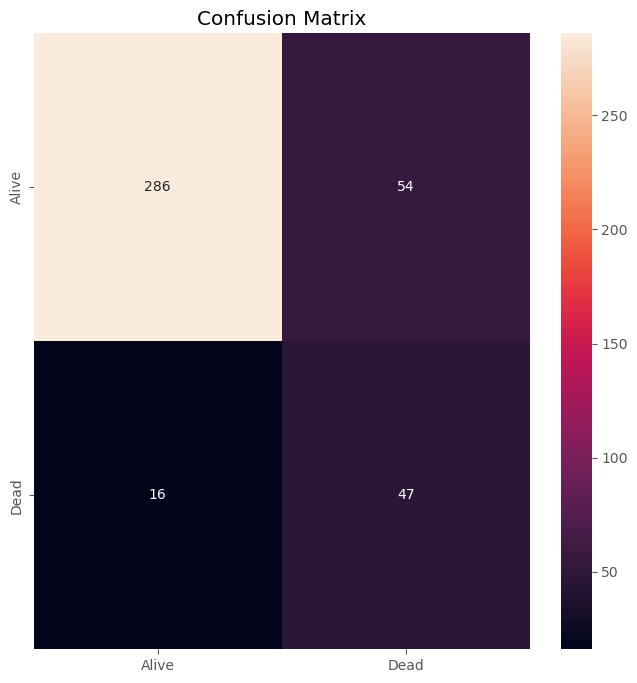

In [29]:
labels = ['Alive', 'Dead']
cm = confusion_matrix(target_test_rel, target_test_pred_svc_grid)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.show()

In [30]:
#grid search with linear Support Vector Machine

# make Pipeline
pipeline_svc_lin = Pipeline([('preprocessing', ColumnTransformer([
                    ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'), cols_cat_nom)], remainder='passthrough')),
                    ('scaler', StandardScaler()),
                    ('classifier', SVC(class_weight='balanced', random_state=42))])

# create k values
k = np.geomspace(1,1000,10, dtype="int")
k = np.unique(k)

# Create the parameter grid
grid_search_svc_lin = [{'classifier__C':[0.1,1, 10, 100],
                   'classifier__gamma':[1,0.1,0.01,0.001]
                    }]

# Create an instance of GridSearch Cross-validation estimator
grid_svc_lin = GridSearchCV(estimator=pipeline_svc_lin,
                     param_grid = grid_search_svc_lin,
                     scoring='f1',
                     cv=3,
                     verbose =1,
                     n_jobs=-1)

# fit the Model
grid_svc_lin.fit(features_train_rel, target_train_rel)

# Print the training score of the best model
print("best score")
print(grid_svc_lin.best_score_)

# Print the model parameters of the best model
print("best model parameter")
print(grid_svc_lin.best_params_)

# Print the test score of the best model
#predict
target_test_pred_svc_grid_lin = grid_svc_lin.predict(features_test_rel)

#save
scores = {'name': "SVC_GridSearch with linear kernel",
          'accuracy': accuracy_score(target_test_rel, target_test_pred_svc_grid_lin) * 100,
          'precision': precision_score(target_test_rel, target_test_pred_svc_grid_lin) * 100,
          'recall': recall_score(target_test_rel, target_test_pred_svc_grid_lin) * 100,
          'F1': f1_score(target_test_rel, target_test_pred_svc_grid_lin) * 100,
             }
model_results.append(scores)
    
#show results
pd.DataFrame(model_results).T

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\flori\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


best score
0.5522219831221175
best model parameter
{'classifier__C': 10, 'classifier__gamma': 0.001}


,0,1,2,3,4,5,6,7,8
name,RandomForestClassifier,RandomForest_GridSearch,LogisticRegression,LogisticRegression_GridSearch,SVC with Gaussian kernel,SVC with polynomial kernel of degree 2,RandomForest_GridSearch_poly,SVC_GridSearch,SVC_GridSearch with linear kernel
accuracy,89.578164,89.578164,80.8933,80.8933,81.141439,82.630273,88.833747,82.630273,82.630273
precision,83.870968,74.418605,43.396226,43.518519,39.68254,45.56962,78.125,46.534653,46.534653
recall,41.269841,50.793651,73.015873,74.603175,39.68254,57.142857,39.68254,74.603175,74.603175
F1,55.319149,60.377358,54.43787,54.97076,39.68254,50.704225,52.631579,57.317073,57.317073
